In [1]:
import pandas as pd
data= pd.read_csv('NYC_Restaurants.csv',dtype=str)

# Question 1: Create a unique name for each restaurant

In [2]:
data['RESTAURANT']= data['DBA'] + " " + data['BUILDING'] + " " + data['STREET']+ " " + data['ZIPCODE']+ " " + data['BORO'] 
data.head()

,Unnamed: 0,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,RESTAURANT
0,0,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection,WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
1,1,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection,WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
2,2,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,Violations were cited in the following area(s).,04H,"Raw, cooked or prepared food is adulterated, c...",Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection,WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
3,3,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,Violations were cited in the following area(s).,06A,Personal cleanliness inadequate. Outer garment...,Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection,WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
4,4,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection,WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN


# Question 2: How many restaurants are included in the data?

In [3]:
len(data['RESTAURANT'].value_counts())

10114

# Question 3: How many chains are there?

In [4]:
all_restaurants = data.drop_duplicates(subset=['RESTAURANT'])
all_restaurants
(all_restaurants['DBA'].value_counts()>1).sum()

368

# Question 4: Plot a bar graph of the top 20 most popular chains


<AxesSubplot:>

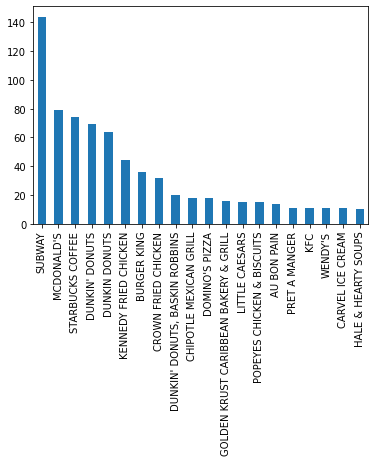

In [5]:
all_restaurants['DBA'].value_counts()[:20].plot(kind='bar')

# Question 5: What fraction of all restaurants are chain restaurants?

In [6]:
non_chain_restaurants_count=(all_restaurants['DBA'].value_counts() <= 1).sum()
chain_restaurant_ratio=(len(all_restaurants)-non_chain_restaurants_count)/len(all_restaurants)
chain_restaurant_ratio

0.16472216729286138

# Question 6: Plot the number of non-chain restaurants in each boro

<AxesSubplot:>

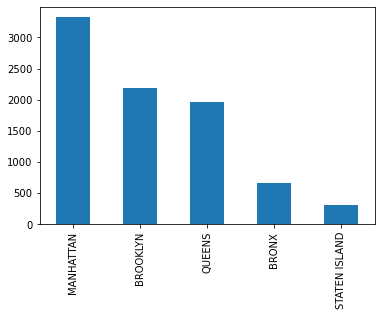

In [7]:
all_restaurants_count=all_restaurants['DBA'].value_counts()
non_chain_restaurants=all_restaurants_count[all_restaurants_count<=1]
nonchain_DBA_list=non_chain_restaurants.index.values
def restaurant_nonchain_or_not(x):
    '''Takes a restaurant as input and returns whether it is a non-chain restaurant or not'''
    return x in nonchain_DBA_list

mask = all_restaurants['DBA'].map(restaurant_nonchain_or_not)
all_restaurants[mask].drop(all_restaurants[mask][all_restaurants[mask]['BORO']=="Missing"].index)['BORO'].value_counts().plot(kind='bar')

# Question 7: Plot the fraction of non-chain restaurants in each boro.

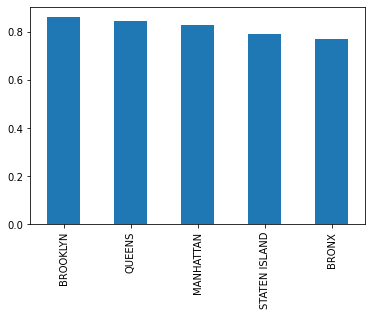

In [8]:
nonchain_restaurant_by_Boro=all_restaurants[mask].drop(all_restaurants[mask][all_restaurants[mask]['BORO']=="Missing"].index)['BORO'].value_counts()
all_restaurant_by_Boro=all_restaurants.drop(all_restaurants[all_restaurants['BORO']=="Missing"].index)['BORO'].value_counts()
fraction_nonchain_restaurant_by_boro=((nonchain_restaurant_by_Boro)/(all_restaurant_by_Boro)).sort_values(ascending=False).plot(kind='bar')

No, Manhattan does not have highest fraction of nonchain restaurant, infact Brooklyn has the highest fraction of the same

# Question 8: Plot the popularity of cuisines.

<AxesSubplot:>

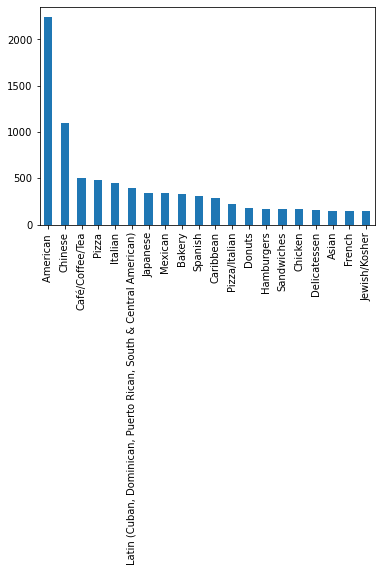

In [9]:
all_restaurants['CUISINE DESCRIPTION'].value_counts()[:20].plot(kind='bar')

# Question 9: Plot the cuisines among restaurants which never got cited for violations.

<AxesSubplot:>

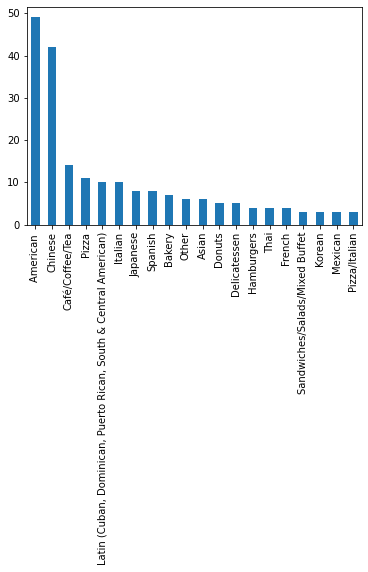

In [10]:
#creating a new column RESTAURANT_CUISINE to take into consideration multiple cusines provided by same Restaurant
data['RESTAURANT_CUISINE']=data['RESTAURANT']+' '+data['CUISINE DESCRIPTION']
unique_restaurant_cuisine=data.drop_duplicates(subset=['RESTAURANT_CUISINE'])
#len(unique_restaurant_cuisine) -> 10117(More than 10114 suggest cases of a single restaurant providing more than one cuisines)

non_clean_restaurants=data[data['VIOLATION CODE'].notnull()].drop_duplicates(subset=['RESTAURANT_CUISINE'])
non_clean_restaurant_list=list(non_clean_restaurants['RESTAURANT_CUISINE'])

def restaurant_non_clean_or_not(x):
    '''Takes in input a restaurant and returns whether it is a non-clean restaurant or not'''
    return x not in non_clean_restaurant_list

clean_restaurants_list=data[data['VIOLATION CODE'].isnull() & (data['RESTAURANT_CUISINE'].map(restaurant_non_clean_or_not))].drop_duplicates(subset=['RESTAURANT_CUISINE'])
clean_restaurants_list['CUISINE DESCRIPTION'].value_counts()[:20].plot(kind='bar')


# Question 10: What cuisines tend to be the “cleanest”?

In [11]:
cuisine_popularity=unique_restaurant_cuisine['CUISINE DESCRIPTION'].value_counts()
cuisines_list=pd.Series(cuisine_popularity[cuisine_popularity>=20].index.values) #filter cuisines with atleast 20 restaurants
cuisines_list.index=cuisines_list

clean_restaurants_list_count=clean_restaurants_list['CUISINE DESCRIPTION'].value_counts()
cuisine_popularity=unique_restaurant_cuisine['CUISINE DESCRIPTION'].value_counts()

def get_ratio(x):
    '''Takes a cuisine as input and calculates Q9/Q8: The ratio of restaurants that never got cited, versus total number
of restaurants, serving that cuisine'''
    if x in clean_restaurants_list['CUISINE DESCRIPTION'].value_counts().index.values:
        q9=clean_restaurants_list_count[x]
    else:
        q9=0
    q8=cuisine_popularity[x]
    ratio=q9/q8
    
    return ratio

top_10_cuisine_highestratios=cuisines_list.map(get_ratio).sort_values(ascending=False)[:10]
print(top_10_cuisine_highestratios)

Soul Food                        0.090909
Vietnamese/Cambodian/Malaysia    0.062500
Other                            0.058252
Continental                      0.047619
Soups & Sandwiches               0.047619
Barbecue                         0.047619
Asian                            0.041096
Chinese                          0.038251
Greek                            0.036364
Peruvian                         0.035714
dtype: float64


# Question 11: What are the most common violations in each borough?

In [12]:
violation_across_boros=pd.crosstab(data['VIOLATION DESCRIPTION'],data['BORO'])
volume_of_violations=violation_across_boros.drop(['Missing'],axis=1)
volume_of_violations.idxmax()

BORO
BRONX            Non-food contact surface improperly constructe...
BROOKLYN         Non-food contact surface improperly constructe...
MANHATTAN        Non-food contact surface improperly constructe...
QUEENS           Non-food contact surface improperly constructe...
STATEN ISLAND    Non-food contact surface improperly constructe...
dtype: object

# Question 12: What are the most common violations per borough, after normalizing for the relative abundance of each violation?

In [13]:
violation_across_boros['VIOLATIONFREQUENCY']=violation_across_boros.sum(axis=1)

def Return_normalized_value(x):
    '''Takes in input the number of violations for each Boro and returns the normalized value for that violation'''
    return x/violation_across_boros['VIOLATIONFREQUENCY']

#Get Normalized values for each boro for each violation
normalized_violation_fractions= violation_across_boros.apply(Return_normalized_value)
normalized_violation_fractions=normalized_violation_fractions.drop(['Missing'],axis=1)
normalized_violation_fractions=normalized_violation_fractions.drop(['VIOLATIONFREQUENCY'],axis=1)

#find maximum normalized fraction for each boro to detect if there are multiple highest fractions
maximum_normalized_fraction = pd.DataFrame(normalized_violation_fractions.max(),columns = ['Maximum Normalized Fraction'])

max_fractions_for_boros = pd.melt(normalized_violation_fractions.reset_index(), id_vars='VIOLATION DESCRIPTION', value_vars=list(normalized_violation_fractions.columns))

#merge the maximum fractions table with the dataframe which contains all the fractions to get only the maximum fraction violations
output_violations = pd.merge(maximum_normalized_fraction, max_fractions_for_boros, left_on=['BORO', 'Maximum Normalized Fraction'], right_on=['BORO', 'value'], how = 'left')
output_violations=output_violations[['BORO','VIOLATION DESCRIPTION','Maximum Normalized Fraction']]
output_violations


,BORO,VIOLATION DESCRIPTION,Maximum Normalized Fraction
0,BRONX,Unprotected food re-served.,0.500000
1,BROOKLYN,Precooked potentially hazardous food from comm...,0.714286
2,MANHATTAN,Out-of package sale of tobacco products observed.,1.000000
3,MANHATTAN,Potable water supply inadequate. Water or ice ...,1.000000
4,QUEENS,Caloric content range (minimum to maximum) not...,1.000000
5,QUEENS,"Harmful, noxious gas or vapor detected. CO ~1 ...",1.000000
6,QUEENS,Raw food not properly washed prior to serving.,1.000000
7,STATEN ISLAND,"Eggs found dirty/cracked; liquid, frozen or po...",0.090909


# Question 13: How many phone area codes correspond to a single zipcode?

In [14]:
def getting_area_code(x):
    '''Takes input phone number and returns the area code'''
    return x[0:3]

data['Area Code']=data['PHONE'].map(getting_area_code)

#removing invalid phone numbers
df_phone_no_notzero=data[data['PHONE']!="0000000000"]
df_phone_no_notzero_notblank=df_phone_no_notzero[df_phone_no_notzero['PHONE']!="__________"]

crosstab_areacode_zipcode=pd.crosstab(df_phone_no_notzero_notblank['Area Code'],df_phone_no_notzero_notblank['ZIPCODE'])

def area_code_with_single_zip_code(x):
    '''Takes input a areacode and returns if it has a single zipcode or not'''
    if x.max()>0 and x.sum()-x.max()==0:
        return True
    else:
        return False
print(crosstab_areacode_zipcode.T.apply(area_code_with_single_zip_code).sum())

33


# Question 14: Find common misspellings of street names


In [15]:
def last_street_word(x):
    '''Takes input a Street name and returns the last word'''
    return x.split()[-1]

def base_street(x):
    '''Takes input a Street name and returns every word except the last word'''
    return " ".join(x.split()[:-1])

#creating required columns
data['STREET TYPE']=data['STREET'].map(last_street_word)
data['STREET BASE']=data['STREET'].map(base_street)
data['STREET BASE & ZIP']=data['STREET BASE'] +" "+ data['ZIPCODE']

data_for_misspellings=data[['STREET TYPE','STREET BASE','STREET BASE & ZIP']]

data_for_misspellings=data_for_misspellings.drop_duplicates()
data_for_misspellings=data_for_misspellings[data_for_misspellings['STREET BASE'].notnull()==True]

merged_for_misspellings=data_for_misspellings.merge(data_for_misspellings,
                                                   left_on='STREET BASE & ZIP',
                                                   right_on='STREET BASE & ZIP')

merged_for_misspellings=merged_for_misspellings[merged_for_misspellings['STREET TYPE_x']!=merged_for_misspellings['STREET TYPE_y']]

#find maximum misspellings for each street to detect if there are multiple misspells for each street name
names_crosstab=pd.crosstab(merged_for_misspellings['STREET TYPE_x'],merged_for_misspellings['STREET TYPE_y'])
maximum_misspells=pd.DataFrame(names_crosstab.max(),columns = ['Maximum Misspellings'])

max_misspells_for_street = pd.melt(names_crosstab.reset_index(), id_vars='STREET TYPE_x', value_vars=list(names_crosstab.columns))
output_misspells=pd.merge(maximum_misspells,max_misspells_for_street,left_on=['STREET TYPE_y','Maximum Misspellings'],right_on=['STREET TYPE_y','value'], how = 'left')
output_misspells=output_misspells.set_index("STREET TYPE_y")

#get required street names
output_misspells.loc[['AVE','ST','RD','PL','BOULEARD','BULEVARD']]['STREET TYPE_x']

STREET TYPE_y
AVE            AVENUE
ST             STREET
RD               ROAD
PL              PLACE
BOULEARD         BLVD
BOULEARD    BOULEVARD
BULEVARD         BLVD
BULEVARD    BOULEVARD
Name: STREET TYPE_x, dtype: object